# Assignment 2

Classify the email using the binary classification method. 
Email Spam detection has two states: a) Normal State – Not Spam, b) Abnormal State – Spam. 
Use K-Nearest Neighbors and 
Support Vector Machine for classification. 
Analyze their performance. 
Dataset link: The emails.csv dataset on the Kaggle 
https://www.kaggle.com/datasets/balaka18/email-spam-classification-dataset-csv 

In [1]:
import pandas as pd
import numpy as np

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('emails.csv')

In [5]:
print('Missing Values')
print(df.isnull().sum())

Missing Values
Email No.     0
the           0
to            0
ect           0
and           0
             ..
military      0
allowing      0
ff            0
dry           0
Prediction    0
Length: 3002, dtype: int64


In [6]:
df.shape

(5172, 3002)

In [7]:
df.describe()

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
count,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,...,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000
mean,6.640565,6.188128,5.143852,3.075599,3.124710,2.627030,55.517401,2.466551,2.024362,10.600155,...,0.005027,0.012568,0.010634,0.098028,0.004254,0.006574,0.004060,0.914733,0.006961,0.290023
std,11.745009,9.534576,14.101142,6.045970,4.680522,6.229845,87.574172,4.314444,6.967878,19.281892,...,0.105788,0.199682,0.116693,0.569532,0.096252,0.138908,0.072145,2.780203,0.098086,0.453817
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,12.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,3.000000,1.000000,1.000000,2.000000,1.000000,28.000000,1.000000,0.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.000000,7.000000,4.000000,3.000000,4.000000,2.000000,62.250000,3.000000,1.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,210.000000,132.000000,344.000000,89.000000,47.000000,77.000000,1898.000000,70.000000,167.000000,223.000000,...,4.000000,7.000000,2.000000,12.000000,3.000000,4.000000,3.000000,114.000000,4.000000,1.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Columns: 3002 entries, Email No. to Prediction
dtypes: int64(3001), object(1)
memory usage: 118.5+ MB


# Prepare features (X) and labels (y)

In [17]:
X = df.iloc[:, 1:-1].values
Y = df.iloc[:, -1].values

# Split the data into training and testing sets (75% train, 25% test)

In [21]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

In [25]:
from sklearn.metrics import (
    ConfusionMatrixDisplay as CMD,
    confusion_matrix as c_mat,
    accuracy_score as ac,
    precision_score as pr,
    recall_score as re,
    f1_score as f1,
    RocCurveDisplay as RCD,
    PrecisionRecallDisplay as PRD
)

In [32]:
def evaluate(model, model_name):
    # predict
    y_pred = model.predict(x_test_scaled)

    accuracy = ac(y_test, y_pred)
    precision = pr(y_test, y_pred)
    recall = re(y_test, y_pred)
    fone = f1(y_test, y_pred)

    cm = c_mat(y_test, y_pred)
    CMD(cm,display_labels=['Not Spam', 'Spam']).plot()
    plt.title(f"{model_name} : Confusion Matrix")
    plt.show()

    print(f"{model_name} Performance")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score : {fone:.4f}")

    PRD.from_estimator(model, x_test_scaled, y_test)
    plt.title(f"{model_name} - Precision Recall Curve")
    plt.show()

    RCD.from_estimator(model, x_test_scaled, y_test)
    plt.title(f"{model_name} - ROC Curve")
    plt.show()    

# KNN

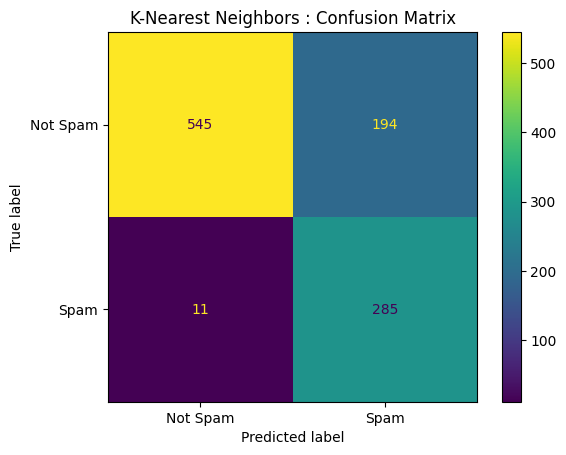

K-Nearest Neighbors Performance
Accuracy: 0.8019
Precision: 0.5950
Recall: 0.9628
F1 Score : 0.7355


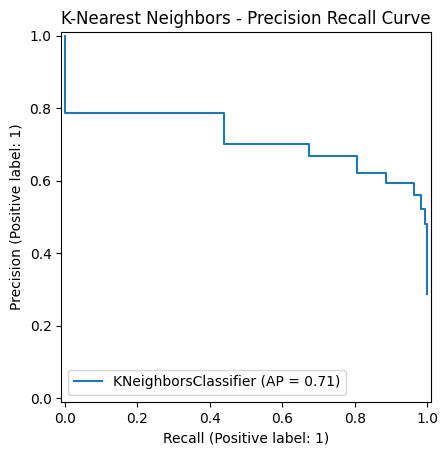

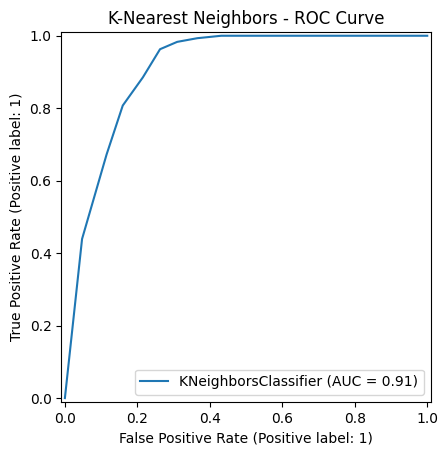

In [33]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=10)
KNN.fit(x_train_scaled, y_train)
evaluate(KNN, 'K-Nearest Neighbors')

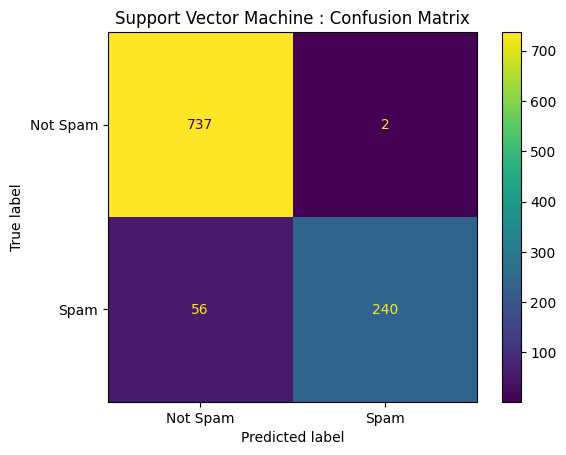

Support Vector Machine Performance
Accuracy: 0.9440
Precision: 0.9917
Recall: 0.8108
F1 Score : 0.8922


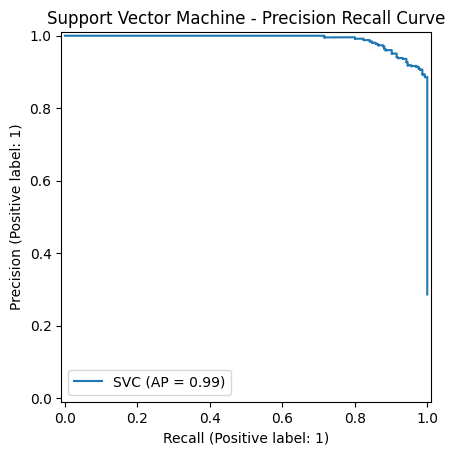

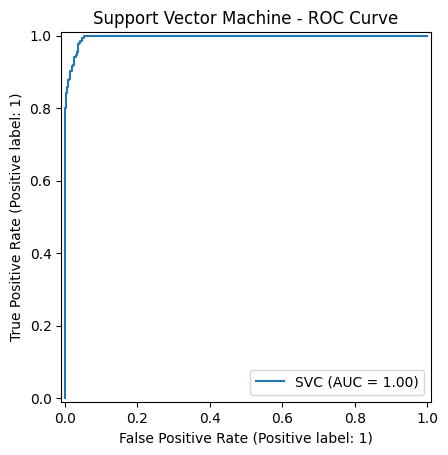

In [37]:
from sklearn.svm import SVC
svm = SVC(gamma='auto',random_state=10)
svm.fit(x_train_scaled,y_train)
evaluate(svm, 'Support Vector Machine')

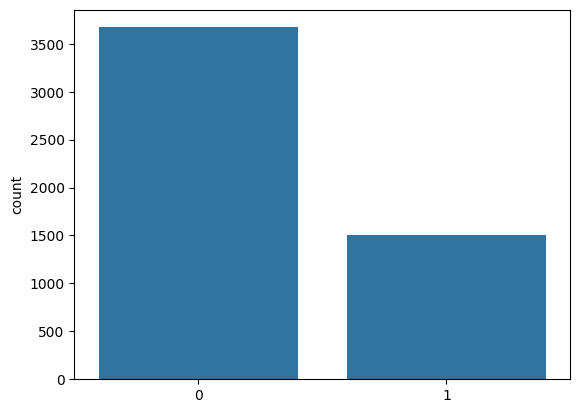

In [40]:
sns.countplot(x=Y)
plt.show()

In [46]:
summary = pd.DataFrame({
    'Metric': ["Accuracy", "Precision", "Recall", "F1 Score"],
    "KNN" : [
        ac(y_test, KNN.predict(x_test_scaled)),
        pr(y_test, KNN.predict(x_test_scaled)),
        re(y_test, KNN.predict(x_test_scaled)),
        f1(y_test, KNN.predict(x_test_scaled))
    ],
    "SVM" : [
        ac(y_test, svm.predict(x_test_scaled)),
        pr(y_test, svm.predict(x_test_scaled)),
        re(y_test, svm.predict(x_test_scaled)),
        f1(y_test, svm.predict(x_test_scaled))
    ],
})

print(summary)

      Metric       KNN       SVM
0   Accuracy  0.801932  0.943961
1  Precision  0.594990  0.991736
2     Recall  0.962838  0.810811
3   F1 Score  0.735484  0.892193


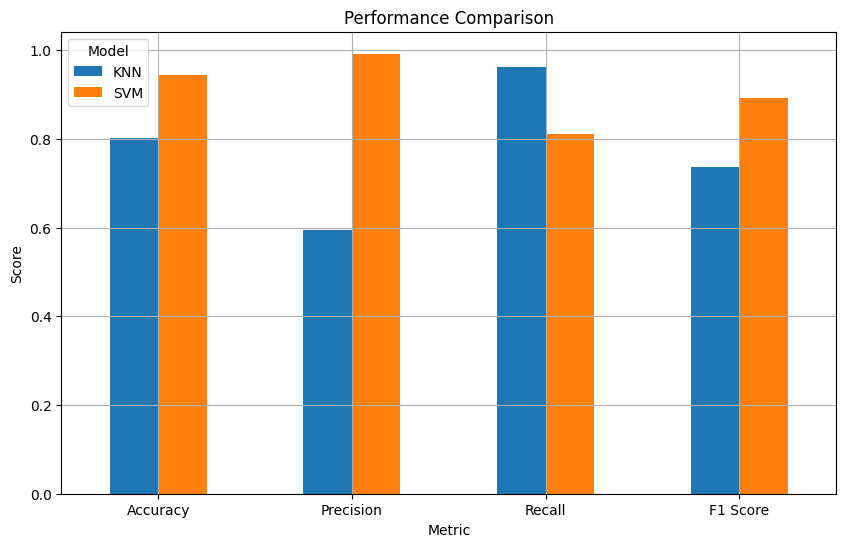

In [48]:
summary.set_index('Metric').plot.bar(figsize=(10,6), rot=0, grid=True, legend=True)
plt.title('Performance Comparison')
plt.ylabel('Score')
plt.legend(title='Model')
plt.show()